In [43]:
import numpy as np
from typing import List, Dict
import matplotlib.pyplot as plt

In [44]:
class QueuingSystemWithInfinityQueue:
    def __init__(self, *, lambda_: float, mu: float, simulation_time: int):
        self.lambda_ = lambda_                    # интенсивность потока требований
        self.mu = mu                              # интенсивность обслуживания требований
        self.simulation_time = simulation_time    # время моделирования системы

        self.requirements = []                    # время поступления нового требования
        self.execute_services = []                # время обслуживания конкретного требования
        self.end_services = []                    # время конца обслуживания конкретного требования
        self.queue = {}                           # очередь на момент подачи i-го требования
        
    def generate_requirements(self) -> List[float]:
        last_requirements_time = 0
        while last_requirements_time < self.simulation_time:
            arrival_time = np.random.exponential(self.lambda_)
            last_requirements_time += arrival_time
            self.requirements.append(last_requirements_time)
        return self.requirements
    
    def get_service_times(self) -> List[float]:
        for _ in range(len(self.requirements)):
            service_time = np.random.exponential(self.mu)
            self.execute_services.append(service_time)
        return self.execute_services
    
    def get_service_end(self) -> List[float]:
        self.end_services.append(self.requirements[0] + self.execute_services[0])
        for requirement in range(len(self.requirements) - 1):
            value = self.requirements[requirement + 1] + self.execute_services[requirement + 1]
            if self.requirements[requirement + 1] < self.end_services[requirement]:
                value += self.end_services[requirement] - self.requirements[requirement + 1]
            self.end_services.append(value)
        return self.end_services
    
    def get_queue(self) -> Dict[int, int]:
        self.queue = {}
        for requirement in range(1, len(self.requirements)):
            self.queue[requirement + 1] = (self.requirements[requirement] < np.array(self.end_services[:requirement])).sum()
        return self.queue
    
    def get_features(self):
        number_of_requirements = len(self.requirements)          # количество требований
        average_service_time = np.mean(self.execute_services)    # среднее время обслуживания
        average_time_spent_in_system = (np.array(self.end_services) - np.array(self.requirements)).mean()    # среднее время пребывания в системе требования
        middle_length_queue = np.mean(list(self.queue.values()))                          # средняя длина очереди
        requirements_per_unit_of_time = number_of_requirements / self.end_services[-1]    # количество требований обслуженных в единицу времени
        arriving_per_unit_of_time = number_of_requirements / self.requirements[-1]        # количество требований поступающих в единицу времени
        
        return {"Number of requirements": number_of_requirements,
                "Average service time": average_service_time,
                "Average time spent in system": average_time_spent_in_system,
                "Middle length queue": middle_length_queue,
                "Requirements per unit of time": requirements_per_unit_of_time,
                "Arriving requirements per unit of time": arriving_per_unit_of_time}

In [64]:
lambda_ = 1
mu = 2
simulation_time = 100

qs = QueuingSystemWithInfinityQueue(lambda_=lambda_,
                                    mu=mu,
                                    simulation_time=simulation_time)

In [65]:
requirements = qs.generate_requirements()
service_time = qs.get_service_times()
service_end = qs.get_service_end()
queue = qs.get_queue()

qs.get_features()

{'Number of requirements': 108,
 'Average service time': 1.8478739534195365,
 'Average time spent in system': 50.04705557681351,
 'Middle length queue': 28.560747663551403,
 'Requirements per unit of time': 0.5319736598537884,
 'Arriving requirements per unit of time': 1.064329993241042}

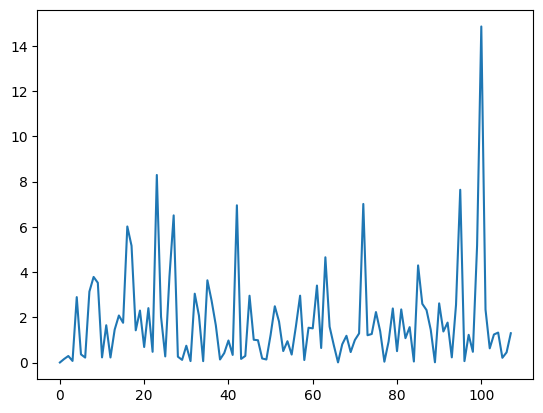

In [66]:
plt.plot(service_time)
plt.show()